In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import copy


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

# allFeat = np.load('../STL-10/resNet50.npy')
# gtAll = np.load('../STL-10/gt.npy')


# allFeat = np.load('../MIT-Places-Small/resNet50.npy')
# gtAll = np.load('../MIT-Places-Small/gt.npy')

allFeat = np.load('../fake-stl10/resNet50.npy')
gtAll = np.load('../fake-stl10/gt.npy')

# # allFeat = np.load('../internetData/resNet50.npy')
# # gtAll = np.load('../internetData/gt.npy')

# mask = gtAll<5
# allFeat = allFeat[mask]
# gtAll = gtAll[mask]



# allFeat = np.load('/tf/notebooks/clusteringTree/stl_feat/feats_2048.npy')
# gtAll = np.load('/tf/notebooks/clusteringTree/stl_feat/labels_2048.npy')-1
# gtAll = gtAll.astype(int)



# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# allFeat = x_train.reshape(x_train.shape[0], 28*28)
# gtAll = y_train

In [4]:
from sklearn.svm import OneClassSVM
from shellUtil import normIt

#allFeat = allFeat/np.linalg.norm(allFeat, axis=1, keepdims=True)

#allFeat, _ = normIt(allFeat)

# flickrFeat =  np.load('../Flickr11K/resNet50.npy', allow_pickle=True)
# m = np.mean(flickrFeat, axis =0)
# allFeat, _ = normIt(allFeat, m)


# dc = np.load('../dogvscat/cats_vs_dogs224feats/feats_test.npy')
# m = np.mean(dc, axis =0)
# allFeat, _ = normIt(allFeat, m)


6 138


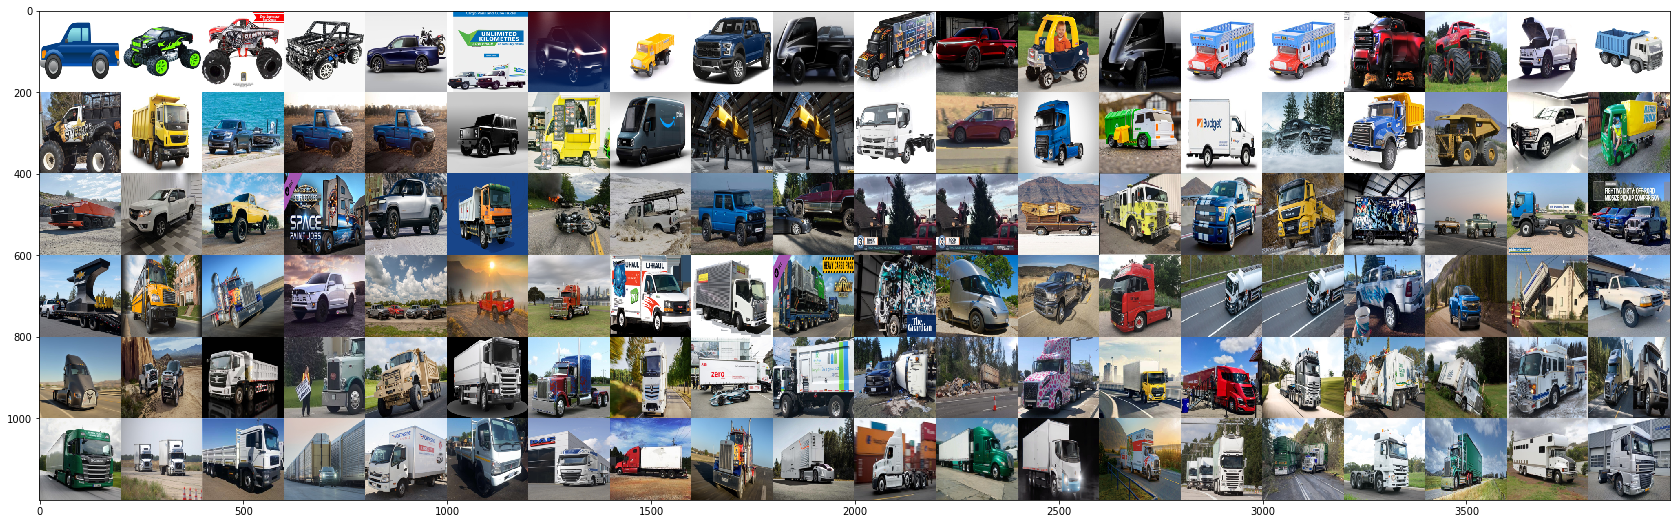

In [5]:
from tensorflow.keras.preprocessing import image
from dirUtil import dirFiles
from tensorflow.keras.layers import concatenate
from anomalyDetectionMeanShell import estShell
from anomalyDetectionMeanShell import projectMean

def displayImages(folder, score, startInd=0, num=400, numPerRow=20, imSize=200, skips=1, fileName=None):
    mask = np.zeros(score.size, dtype=int)
    mask[::skips] = 1
    endInd = startInd + score.size
    rankInd = np.argsort(-score)
    files = dirFiles(folder, ['*.jpg', '*.JPG', '*.png'])
    imList = []
    for i in range(startInd, endInd):
        if mask[rankInd[i]]==0 or len(imList)>num:
            continue
        f = files[rankInd[i]]
        img = image.load_img(f, target_size=(imSize, imSize), interpolation='bilinear')
        #plt.imshow(img)
        imList.append(img)
    bigIm = np.concatenate(imList[:numPerRow], axis=1)
    numRows = int(len(imList)/numPerRow)
    print(numRows,len(imList))
    for i in range(1,numRows):
        cur = i*numPerRow
        newIm = np.concatenate(imList[cur:cur+numPerRow], axis=1)
        bigIm = np.concatenate([bigIm, newIm], axis= 0)
    
    
    #imConcat = np.concatenate(imList[:10], axis=1)
    fig = plt.figure(figsize=(30, numRows*30/numPerRow))  # specify (width,height) in inches
    plt.imshow(bigIm)
    
    if fileName:
        im = image.array_to_img(bigIm)
        im.save(fileName)

from anomalyDetectionMeanShell import estInliers
from anomalyDetectionMeanShell import projectMean

f_ = allFeat[gtAll==9]

m_, var, eSig, inlier, f = estInliers(f_)
err = projectMean(f, m_, var)
       
        
        
file = '../fake-stl10/truck/'
#file = '../STL-10/9'
#file = '../MIT-Places-Small/airport/'

displayImages(file, err, num=600, startInd=0, skips=3)
#displayImages('../fake-stl10/airplane', e)

In [6]:
#f_ = f_/np.linalg.norm(f_, axis=1, keepdims=True)
clf1 = OneClassSVM(gamma='auto').fit(f_)
labels = clf1.predict(f_)
s = clf1.score_samples(f_)



6 138


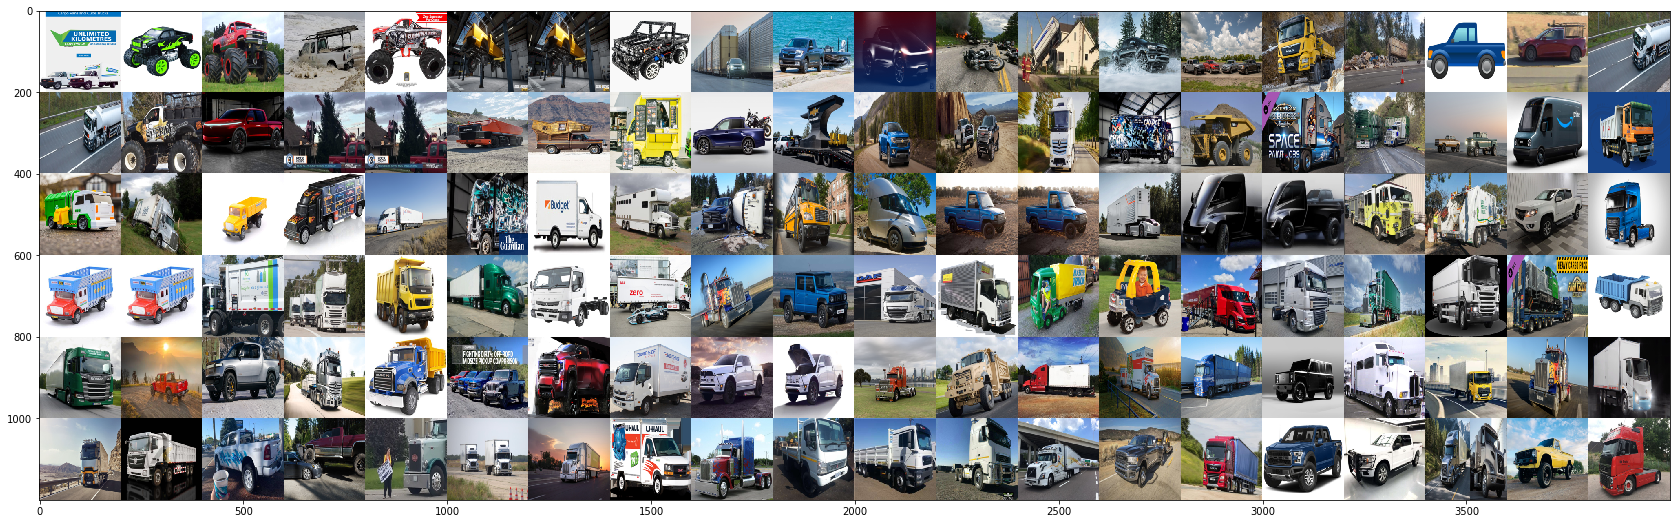

In [7]:
displayImages(file, -s, num=600, startInd=0, skips=3,  fileName = 'ocsvm_airplane.jpg')
